<a href="https://colab.research.google.com/github/Ssurf777/DL_from_scratch/blob/main/%E2%98%86My_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **【MLP】**

# 注意事項

- 🔴 **重要**: この部分は赤文字の代わりに赤い丸を使っています。
- 🔵 **参考**: 青丸で補足情報を表します。


## 【Softmaxの順伝播と逆伝播】

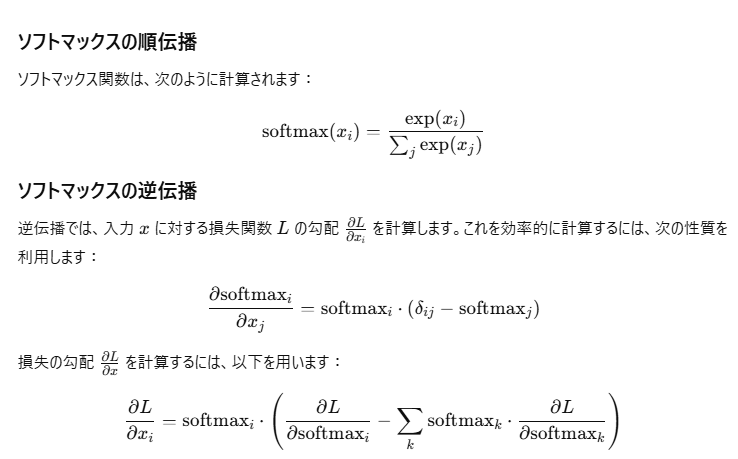

~~~ python
import numpy as np

def softmax_forward(x):
    """
    ソフトマックス関数の順伝播
    Args:
        x: 入力 (N, D) - Nはバッチサイズ、Dは特徴量の数
    Returns:
        y: ソフトマックス出力 (N, D)
    """
    # 数値的安定性のために最大値を引く
    x_shifted = x - np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x_shifted)
    y = exp_x / np.sum(exp_x, axis=1, keepdims=True)
    return y

def softmax_backward(dy, y):
    """
    ソフトマックス関数の逆伝播
    Args:
        dy: ソフトマックス出力の勾配 (N, D)
        y: ソフトマックス出力 (N, D)
    Returns:
        dx: ソフトマックス入力の勾配 (N, D)
    """
    # dyは損失関数のソフトマックス出力に対する勾配
    # yはソフトマックス出力
    dx = y * (dy - np.sum(dy * y, axis=1, keepdims=True))
    return dx

~~~

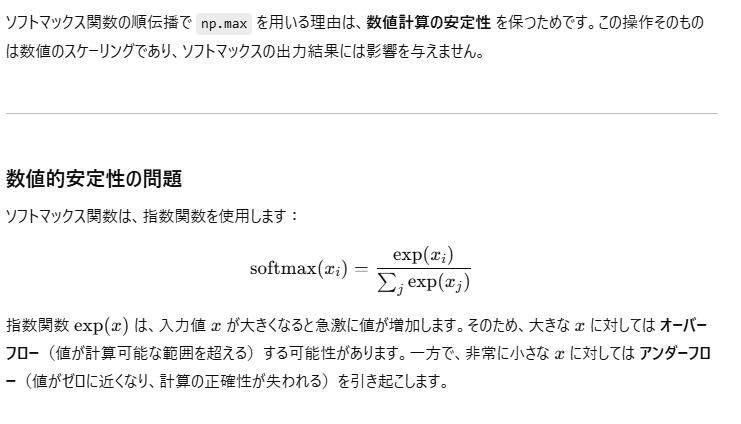

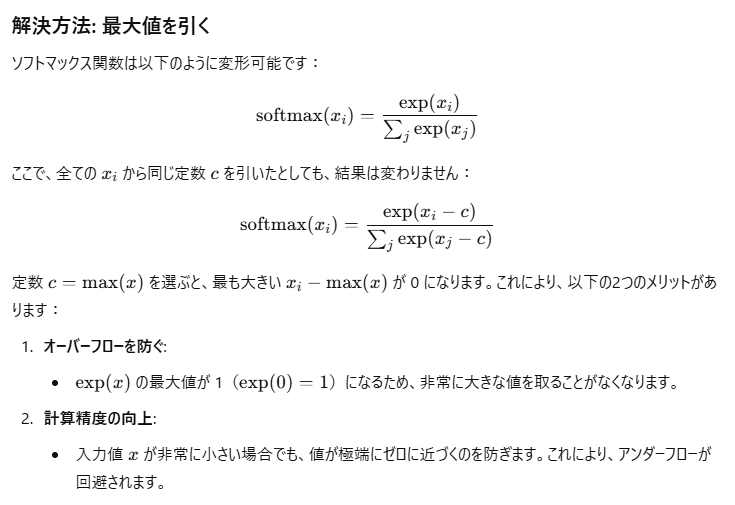

## 【交差エントロピー】

## 【全結合 Affine変換】

# **【強化学習】**

##【状態価値関数 $V(s)$ と行動価値関数 $Q(s, a)$】

状態価値関数 $V(s)$ と行動価値関数 $Q(s, a)$ には次の関係があります：

状態はVs**ブイエス**、行動は**キューエスエー**

🔴

$$
V(s) = \sum_{a \in \mathcal{A}} \pi(a|s) Q(s, a)
$$

式の説明

- **$V(s)$: 状態価値関数**  
  状態 \(s\) における期待報酬（価値）を表します。エージェントが状態 \(s\) にいるとき、これから得られる累積報酬の期待値を示します。

$$
V(s) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t r_{t+1} \,|\, s_t = s \right]
$$

- **$Q(s, a)$: 行動価値関数**  
  状態 \(s\) で行動 \(a\) を選択した場合の期待報酬（価値）を表します。この状態と行動の組み合わせから得られる累積報酬の期待値を示します。

$$
Q(s, a) = \mathbb{E}_{\pi} \left[ \sum_{t=0}^{\infty} \gamma^t r_{t+1} \,|\, s_t = s, a_t = a \right]
$$

- **$\pi(a|s)$: 方策（Policy）**  
  状態 $(s$) において、行動 $(a$) を選択する確率を表します。エージェントの行動戦略を定義します。

- **$\mathcal{A}$: 行動空間**  
  状態 \(s\) における可能な行動の集合を表します。

- **$\gamma \in [0, 1]$: 割引率**  
  未来の報酬にどれだけ重みを与えるかを決定します。値が小さいほど、近い将来の報酬が重視されます。

- **$r_t$: 時刻 $t$ における報酬**  
  時刻 $t$ に得られる即時報酬を表します。

---
状態価値関数と行動価値関数の関係

状態価値関数 $V(s)$ は、状態 $s$ における全ての行動 $a$ にわたる行動価値関数 $Q(s, a)$ の期待値として定義されます。この期待値は、方策 $\pi(a|s)$ に基づいて計算されます。


## 【TD法】

### TD法：SARSAとQ学習

TD法（Temporal Difference法）には主に以下の2つの手法があります：

1. **SARSA**  
2. **Q学習**

---

### SARSA

SARSAは以下の更新式を持ちます：

🔴

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ R + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \right]
$$

### 特徴
- SARSAは方策 $\pi(a|s)$ に基づいた「オンポリシー」のアルゴリズムです。
- エージェントが実際に選択した行動 $a_{t+1}$ を考慮して更新を行います。

---

### Q学習

Q学習は以下の更新式を持ちます：

🔴

$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \left[ R + \gamma \max_{a} Q(s_{t+1}, a) - Q(s_t, a_t) \right]
$$

### 特徴
- Q学習は「オフポリシー」のアルゴリズムです。
- 次の状態 $s_{t+1}$ で最も高い価値（行動価値関数）を持つ行動を基準に更新を行います。
- 方策とは独立して価値を最適化します。

---

### 各変数の説明

- **$Q(s, a)$: 行動価値関数**  
  状態 $s$ で行動 $a$ を選択した場合の期待報酬。

- **$s_t$: 現在の状態**  
  時刻 $t$ における状態。

- **$a_t$: 現在の行動**  
  時刻 $t$ における行動。

- **$R$: 即時報酬**  
  状態遷移に伴い得られる即時的な報酬。

- **$\alpha \in (0, 1]$: 学習率**  
  Q値の更新における重み。

- **$\gamma \in [0, 1]$: 割引率**  
  未来の報酬にどれだけ重みを与えるかを決定するパラメータ。

- **$\pi(a|s)$: 方策**  
  状態 $s$ で行動 $a$ を選択する確率。

---

### SARSAとQ学習の違い

| 特徴       | SARSA                              | Q学習                              |
|------------|------------------------------------|------------------------------------|
| 方策       | オンポリシー                      | オフポリシー                      |
| 更新基準   | 実際に選択した行動 $a_{t+1}$ を考慮 | 最大価値の行動 $\max_{a} Q(s_{t+1}, a)$ を考慮 |
| 特徴       | 方策に基づく学習                  | 方策から独立して価値を最適化      |


## 【ベルマン方程式（Bellman Equation）】

ベルマン方程式は、強化学習において価値関数を定義する基礎的な関係式です。  
価値関数は次の状態の価値を再帰的に利用して定義されます。

---

### 状態価値関数のベルマン方程式

以下は、状態価値関数 $V(s)$ に基づくベルマン方程式です：

🔴

$$
V(s) = \sum_{a} \pi(a|s) \sum_{s', r} P(s', r | s, a) \left[ r + \gamma V(s') \right]
$$

### 各項の説明

- **$V(s)$**: 状態 $s$ における価値関数（状態価値関数）  
  状態 $s$ にいる際に将来得られる累積報酬の期待値。

- **$\pi(a|s)$**: 方策  
  状態 $s$ において行動 $a$ を選択する確率。

- **$P(s', r | s, a)$**: 確率遷移モデル  
  状態 $s$ で行動 $a$ を取った場合に、次の状態 $s'$ に遷移し報酬 $r$ を得る確率。

- **$r$**: 即時報酬  
  状態 $s$ で行動 $a$ を取った際に得られる報酬。

- **$\gamma \in [0, 1]$**: 割引率  
  未来の報酬にどれだけ重みを与えるかを決定するパラメータ。$\gamma = 0$ の場合、即時報酬のみを考慮し、$\gamma = 1$ に近い場合は未来の報酬を重視します。

---

### ベルマン方程式の解釈

ベルマン方程式は、現在の状態価値 $V(s)$ を、次の状態 $s'$ の価値 $V(s')$ と即時報酬 $r$ を用いて表現します。  
これは再帰的な構造を持ち、価値関数の最適化に重要な役割を果たします。

### 再帰的な性質
状態価値関数は次の状態の価値を含むため、全体の価値関数は逐次的に計算されます。この性質を利用して、価値反復法や方策反復法で最適方策を求めることができます。

---

### 方策評価のベルマン方程式

ベルマン方程式を用いることで、特定の方策 $\pi$ に基づいた状態価値関数を計算できます。このプロセスを**方策評価（Policy Evaluation）**と呼びます。

---

### 行動価値関数のベルマン方程式

行動価値関数 $Q(s, a)$ に基づくベルマン方程式は次のように表現されます：

🔴

$$
Q(s, a) = \sum_{s', r} P(s', r | s, a) \left[ r + \gamma \sum_{a'} \pi(a'|s') Q(s', a') \right]
$$

### 特徴
行動価値関数では、特定の行動 $a$ を選択した後の期待報酬を評価します。これは強化学習アルゴリズムの基盤となる関数です。

---

### ベルマン方程式の応用

1. **価値反復法（Value Iteration）**  
   最適な価値関数を反復計算で求めるアルゴリズムです。

2. **方策反復法（Policy Iteration）**  
   方策を反復的に改善しながら、最適方策を求めるアルゴリズムです。

3. **Q学習**  
   オフポリシー学習アルゴリズムで、行動価値関数の最適化に基づいています。
